

---

**Part 1: Data Loading and Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('onlinefoods.csv')

print(data.isnull().sum())

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64


In [ ]:
data.fillna(method='ffill', inplace=True)

In [ ]:
X = pd.get_dummies(data.drop(columns=['Feedback']), drop_first=True)
Y = data['Feedback']



---

**Part 2: Exploratory Data Analysis (EDA)**

In [ ]:
print(data.describe())

              Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000


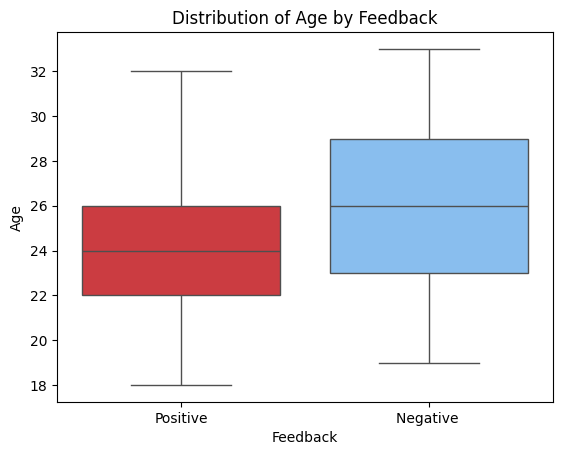

In [ ]:
sns.boxplot(data=data, x='Feedback', y='Age', palette=["#e3242b", "#78bfff"])

plt.title('Distribution of Age by Feedback')
plt.show()

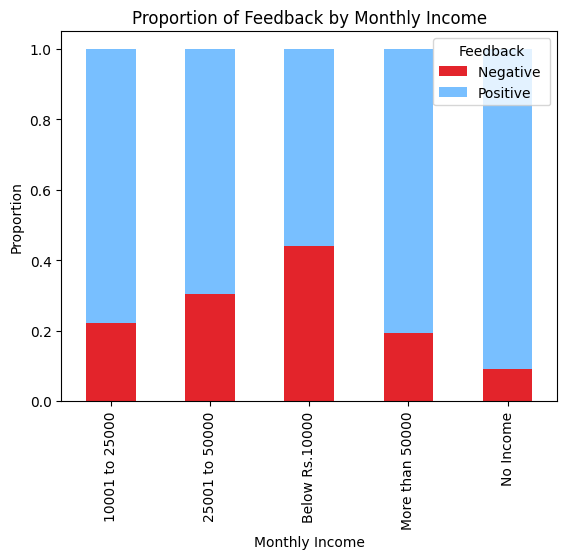

In [ ]:
income_feedback_proportions = data.groupby('Monthly Income')['Feedback'].value_counts(normalize=True).unstack()

colors = ["#e3242b", "#78bfff"]
sns.set_palette(sns.color_palette(colors))

income_feedback_proportions.plot(kind='bar', stacked=True)

plt.title('Proportion of Feedback by Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Proportion')
plt.legend(title='Feedback')
plt.xticks()
plt.show()

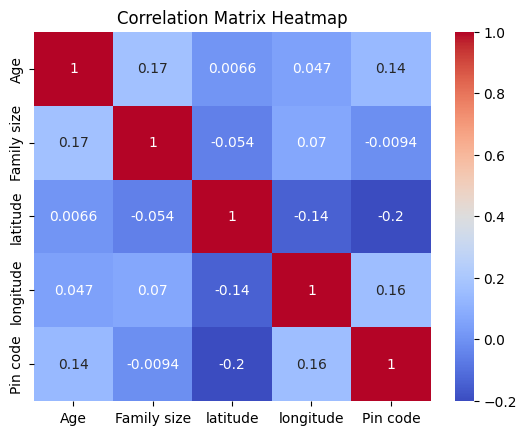

In [ ]:
corr_matrix = data.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix Heatmap')
plt.show()



---

**Part 3: Logistic Regression Model**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, data['Feedback'], test_size=0.2, random_state=69)

In [ ]:
scaler = StandardScaler()

numerical_features = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, pos_label='Positive')
recall = recall_score(Y_test, Y_pred, pos_label='Positive')
conf_matrix = confusion_matrix(Y_test, Y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.782051282051282
Precision: 0.8115942028985508
Recall: 0.9333333333333333
Confusion Matrix:
 [[ 5 13]
 [ 4 56]]




---

**Part 4: Data Analysis and Visualization**

In [ ]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance['Importance'] = scaler.fit_transform(feature_importance['Importance'].values.reshape(-1, 1))

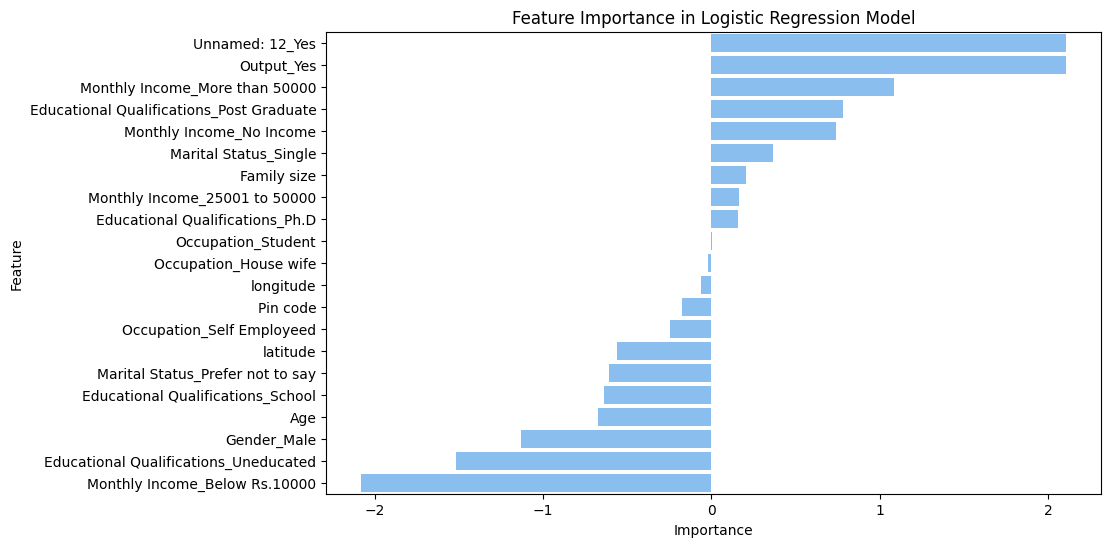

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(data=feature_importance, x='Importance', y='Feature', palette=["#78bfff"])

plt.title('Feature Importance in Logistic Regression Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

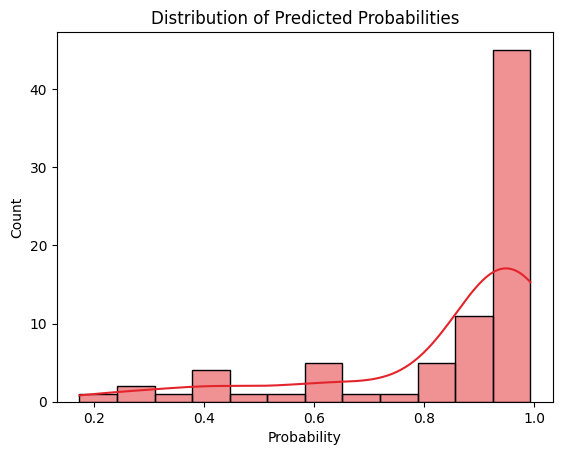

In [ ]:
Y_prob = model.predict_proba(X_test)[:, 1]

sns.histplot(Y_prob, kde=True)

plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()

⠀⢀⠀⢀⣀⣠⣤⣤⣤⣤⣤⣀⣀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣀⣀⣠⣠⣤⣤⣤⣤⣀⠲⢦⣄⡀⠀⠀
⡶⢟⣴⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣦⡀⠀⠀⠀⠀⠀⠰⣷⣷⣶⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣶⣬⡛⢷⣔
⣾⡿⠟⠋⠉⠁⠀⡀⠀⠀⠀⠀⠈⠉⠉⠙⠛⢻⠛⠛⠋⠀⠀⠀⠀⠀⠀⠀⠈⠙⢛⣛⣛⣛⣛⣉⢉⣉⡀⠀⠀⠀⠀⠀⠈⠉⠛⢿⣷⣝
⠃⠀⠀⠀⠀⠀⠀⣛⣛⣛⣛⣛⣛⢛⡛⠛⠛⠛⣰⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⣌⠛⠛⢛⣛⣛⣛⣛⣛⣛⣛⣓⣀⠀⠀⠀⠀⠀⠈⢻
⠀⠀⠀⢀⣤⡾⠛⢻⣿⣿⣿⡿⣿⡟⢻⣿⠳⠆⠘⣿⣦⠀⠀⠀⠀⠀⠀⠀⣰⣿⠁⠐⠛⣿⡟⢻⣿⣿⣿⣿⢿⣟⠛⠻⣦⣀⠀⠀⠀⠀
⠀⠀⢴⠿⣧⣄⣀⣘⣿⣿⣿⣿⣿⡿⣀⡙⢷⠀⢀⡿⠁⠀⠀⠀⠀⠀⠀⠀⠈⢻⡖⠀⣾⣋⣀⣺⣿⣿⣿⣿⣿⣏⣀⣤⣴⠿⢷⠀⠀⠀
⠀⠀⠀⠀⠈⠉⠉⠉⠉⠉⠉⠙⠉⠉⠉⠉⠛⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠋⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠁⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣼⠆⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⣿⠉⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⡿⠁⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣿⠆⠀⠀⢀⣿⠁⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣠⣶⠟⠁⠀⠀⠀⣾⠇⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣤⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣀⣀⣀⣀⣀⣤⣤⣴⣶⣾⠿⠛⠋⠀⠀⠀⠀⠀⢸⡟⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢻⣿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠟⠛⠛⠛⠛⠉⠉⠉⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⠇⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠛⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⣿⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠋⠀⠀⠀⠀⠀⠀⠀